<a href="https://colab.research.google.com/github/pavan-potnuru/hotel-booking-analysis-team-repository/blob/main/Hotel_booking_analysis(Final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
# Importing reguired libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Connecting google drive
from google.colab import drive
drive.mount('/content/drive')

# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Copy of Hotel Bookings.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Inspection**

In [72]:
# First look
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [73]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**DataSet Information:**
 
 hotel : Type of he hotel (Categorical)
 
 is_canceled : whether booking is canceled 0 - not canceled 1-canceled(Categorical)

lead_time : the number of days between the time a guest books their room and the time they are scheduled to arrive at the hotel.(Numerical)

arrival_date_year : year of Arravial (Numerical)

arrival_date_month : month of arravial (Categorical)

arrival_date_week_number : Week of arravail (Numerical)

arrival_date_day_of_month : Arravial day (Nummerical)

stays_in_weekend_nights : no of weekend nights during the stay (Numerical)

stays_in_week_nights : no of night stays in week days (Numerical)

adults : number of adults (Numerical)

children : number of Childeren (Numerical)

babies : number of babies (Numerical)

meal : Type of meal (categorical)

country : Country of customer (Categorical)

market_segment : Means through wich hotel got booking (Categorical)

distribution_channel :  Means through wich hotel got booking (Categorical)

is_repeated_guest : whether the guest is repated 0-not repeated 1 -repeatd (categorical)

previous_cancellations : number of canceletions done by customer previously (categorical)

previous_bookings_not_canceled : number of bookings compeleted without canceletion (Numerical)

reserved_room_type : reserved type of room (Categorical)

assigned_room_type : type of room assigned (Categorical)

booking_changes : canges made to booking (Numerical)

deposit_type : type of deposit (categorical)

agent : ID of agent (Categorical)

company : ID of company (categorical)

days_in_waiting_list : no of days to wait (Numerical)

customer_type : type of customer (Categorical)

required_car_parking_spaces : Number of parking spaces required (Numerical)

total_of_special_requests : special request made by customer (Numberical)

reservation_status : Status of reservation (Categorical)

reservation_status_date : Date of reservation (Date)

adr : average daily rate (Numerical)


# **Data Cleaning**

Data cleaning is an importent part of EDA, in data cleaning we perform operations like

 1) Removing Duplicates

 2) Handling missing values

 3) Handling Features (i.e, Merging similar columns, removing irrelavant columns and correting the data types)

In [74]:
#creating a copy of data
df = dataset.copy()

**1.Removing Duplicates**

In [75]:
# Show no. of rows of duplicate rows duplicate rows
df[df.duplicated()].shape 

(31994, 32)

In [76]:
# Removing duplicate values
df.drop_duplicates(inplace = True)

In [77]:
#checking for duplicates
df[df.duplicated()].shape

(0, 32)

In [78]:
# number of obeservations after removing duplicates
df.shape

(87396, 32)

**2.Handling missing values**

In [79]:
# null value count in each colum
new_df.isnull().sum().sort_values()

hotel                                  0
reservation_status                     0
total_of_special_requests              0
required_car_parking_spaces            0
adr                                    0
customer_type                          0
days_in_waiting_list                   0
deposit_type                           0
booking_changes                        0
assigned_room_type                     0
reserved_room_type                     0
previous_bookings_not_canceled         0
previous_cancellations                 0
reservation_status_date                0
distribution_channel                   0
is_repeated_guest                      0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_nights                   0
stays_in_weekend_nights                0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
arrival_date_wee

From above we can see that only four columns( children, country, agent and company) have missing values.

In [80]:
df[['company','agent']] = df[['company','agent']].fillna(0)

Since agent and company are booking mediums for customers there is a chance that customer can book directly without any medium. So we can replace the null values with 0.

In [81]:
df['country'] = df['country'].fillna('others')

We have 452 null values in country column, so we can fill these with 'others'

In [82]:
df['children'] = df['children'].fillna(0)

We can replace the null values in childern column with 0, since there is a high chance for customers having zero childern might be missing to fill the column 

In [83]:
#checking all the missing values were removed
df.isnull().sum().sort_values()

hotel                             0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number          0
arrival_date_month                0
arrival_date_year           

There are some rows where adult,children and babies column has 0 in it. We can remove those row for which these three column have 0 as value simultaneously.

In [84]:
#checking how many rows have adult, childern and babies as 0
df[df['adults']+df['children']+df['babies'] == 0].shape

(166, 32)

In [85]:
# we have 166 rows with 0 values so we can drop these rows
df.drop(df[df['adults']+df['children']+df['babies'] == 0].index,inplace=True)

**3.Features Handling**

In [86]:
df[['market_segment','distribution_channel']].value_counts()

market_segment  distribution_channel
Online TA       TA/TO                   51254
Offline TA/TO   TA/TO                   13700
Direct          Direct                  11467
Corporate       Corporate                3893
Groups          TA/TO                    3606
                Corporate                 665
                Direct                    651
Complementary   Direct                    539
Direct          TA/TO                     229
Aviation        Corporate                 216
Corporate       TA/TO                     154
                Direct                    153
Online TA       GDS                       136
                Direct                    128
Offline TA/TO   Corporate                  95
Direct          Corporate                  81
Complementary   Corporate                  78
                TA/TO                      75
Offline TA/TO   GDS                        44
Online TA       Corporate                  34
Offline TA/TO   Direct                     

From above we can see that, even though market_segment and distribution_channel looks similar but there sub categories in each market_segment. So we cannot merge or remove any one of these two columns.

We can create a new colums for total number of night stays by adding stays_in_weekend_nights and stays_in_week_nights as total_night_stays

In [87]:
#creating new column for total night stays
df['total_night_stays'] = df['stays_in_week_nights']+df['stays_in_weekend_nights']

In [88]:
# creating new column for lead time interms of month
lead_time_months =df['lead_time'] // 30
lead_time_months.value_counts() / len(df)
df['lead_time_month'] = df['lead_time'] // 30

In [89]:
# creating a new column for cancellation
def cancellation(row):
    if (row['previous_cancellations'] == 0):
        return 0
    else :
        return 1

df['is_previously_cancelled'] = df.apply(cancellation, axis = 1)

In [90]:
#creating new column for non adults
df['kids'] = df['babies']+df['children']

In [91]:
#creating new column for total number of people
df['total_people'] = df['babies']+df['children']+df['adults']

In [92]:
#changing data type from float to integer
df[['children', 'company', 'agent','total_people']] = df[['children', 'company', 'agent','total_people']].astype('int64')

In [93]:
#changing to date type from string
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format = '%Y-%m-%d')

### **Exploratory Data Analysis**

**Univariate Analysis**

In univariate Analysis we try to observe the patterns in each feature of the data through their value counts. Mostly we try to get insights on counts, mean, median, mode etc of that particular feature and compare different values in that feature

In [94]:
#Let us write a function to plot so that we can avoid repetition of code
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):
    
    '''
    INPUT parameters:
        x:        Array containing values for x-axis
        y:        Array containing values for y-axis
        x_lable:  String value for x-axis label
        y_lable:  String value for y-axis label
        title:    String value for plot title
        figsize:  tuple value, for figure size (default size is (7,5))
        type:     type of plot (default is bar plot)
        
    OUTPUT:
        Display the plot
    '''
    
    sns.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax)
        
        
    
    plt.show()

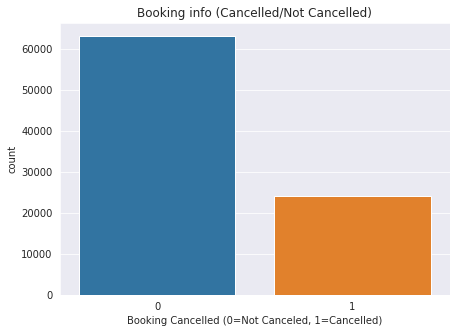

Not Canceled =72.4762123122779, Cancelled = 27.523787687722113


In [95]:
#is_cancelled analysis
df1=df['is_canceled']
df1=df1.value_counts()
x=df1.index.values
y=df1.values
plot(x,y,x_label='Booking Cancelled (0=Not Canceled, 1=Cancelled)',y_label='count',title='Booking info (Cancelled/Not Cancelled)')

no_of_confirmed_bookigs=df1[0]
no_of_cancelled_bookigs=df1[1]
sum=no_of_confirmed_bookigs+no_of_cancelled_bookigs
print('Not Canceled =' + str(no_of_confirmed_bookigs/sum*100) + ', Cancelled = '+ str(no_of_cancelled_bookigs/sum*100))

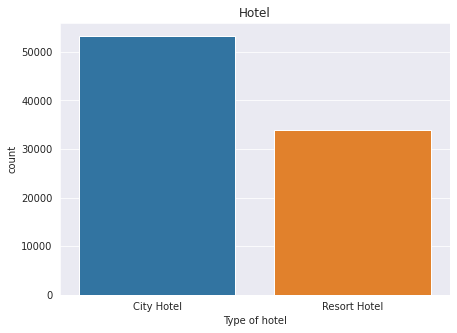

city_hotel =61.073025335320416, resort_hotel = 38.926974664679584


In [96]:
#Hotel
df1=df['hotel']
df1=df1.value_counts()
x=df1.index.values
y=df1.values
plot(x,y,x_label='Type of hotel',y_label='count',title='Hotel')

city_hotel=df1[0]
resort_hotel=df1[1]
sum=city_hotel+resort_hotel
print('city_hotel =' + str(city_hotel/sum*100) + ', resort_hotel = '+ str(resort_hotel/sum*100))

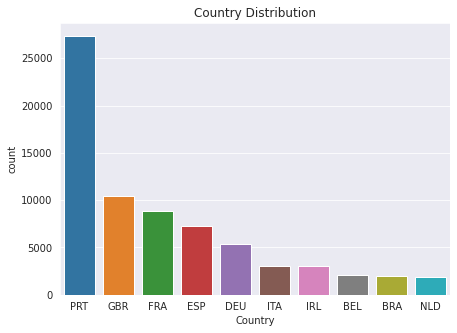

In [97]:
#Country
df1=df['country']
df1=df1.value_counts()[:10]
x=df1.index.values
y=df1.values
plot(x,y,x_label='Country',y_label='count',title='Country Distribution')

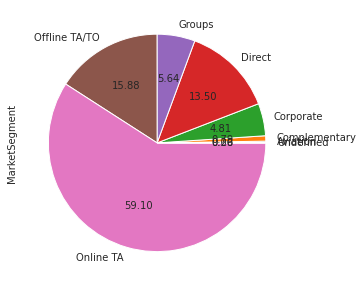

In [98]:
# market_segment
fig, ax = plt.subplots(ncols=1, figsize=(10, 5))

df.groupby('market_segment').size().plot(kind='pie', autopct='%.2f',ax=ax)
ax.set_ylabel('MarketSegment')
plt.show()

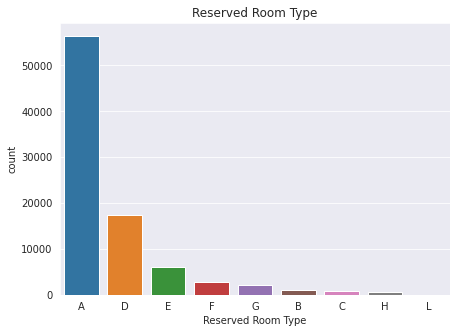

In [99]:
#reserved_room_type
df1=df['reserved_room_type']
df1=df1.value_counts()
x=df1.index.values
y=df1.values
plot(x,y,x_label='Reserved Room Type',y_label='count',title='Reserved Room Type')

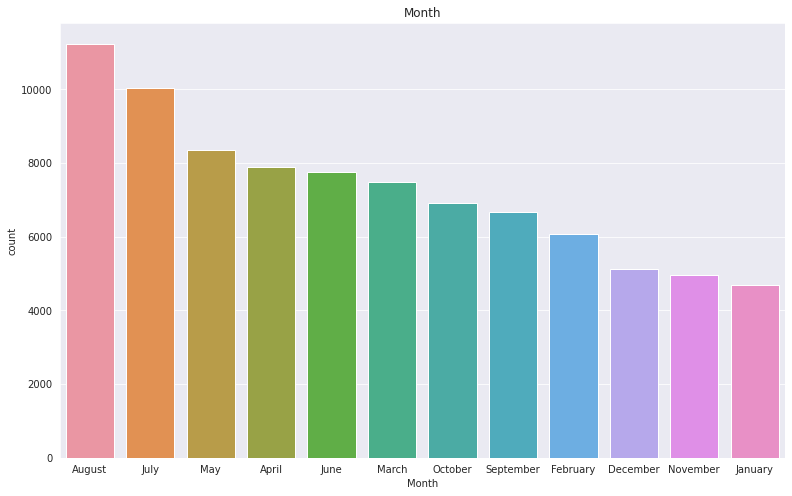

In [100]:
#arrival_date_month
df1=df['arrival_date_month']
df1=df1.value_counts()
x=df1.index.values
y=df1.values
plot(x,y,x_label='Month',y_label='count',figsize=(13,8),title='Month')

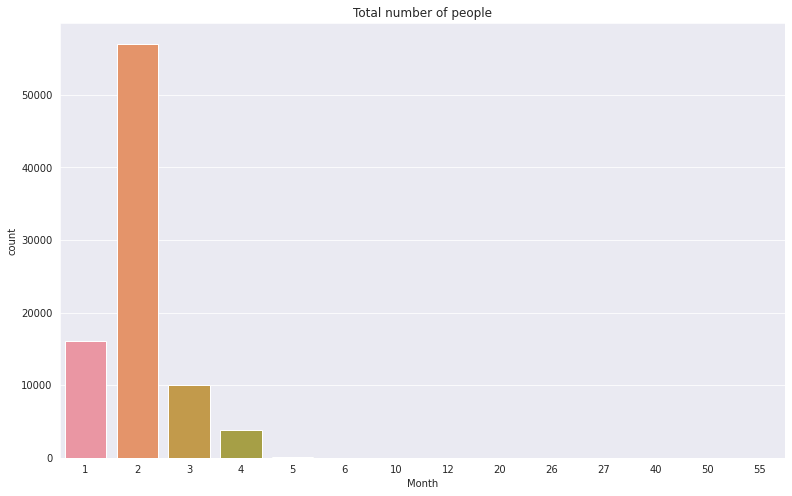

In [101]:
#total_people
df1=df['total_people']
df1=df1.value_counts()
x=df1.index.values
y=df1.values
plot(x,y,x_label='Month',y_label='count',figsize=(13,8),title='Total number of people')

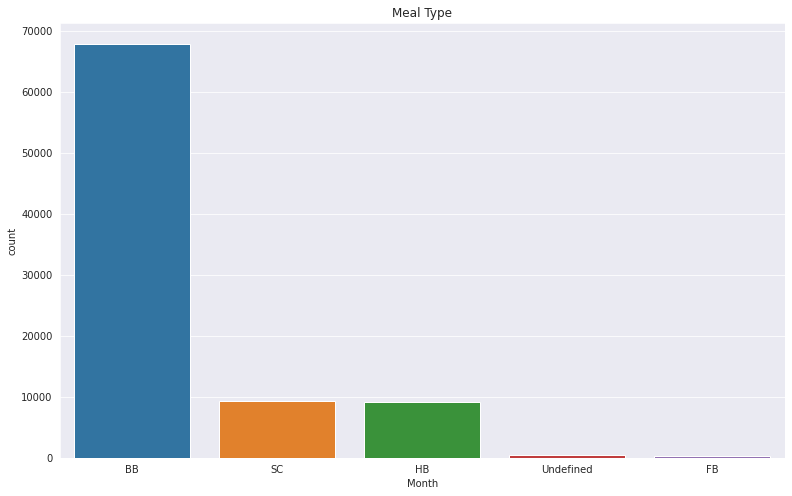

In [102]:
#meal
df1=df['meal']
df1=df1.value_counts()
x=df1.index.values
y=df1.values
plot(x,y,x_label='Month',y_label='count',figsize=(13,8),title='Meal Type')

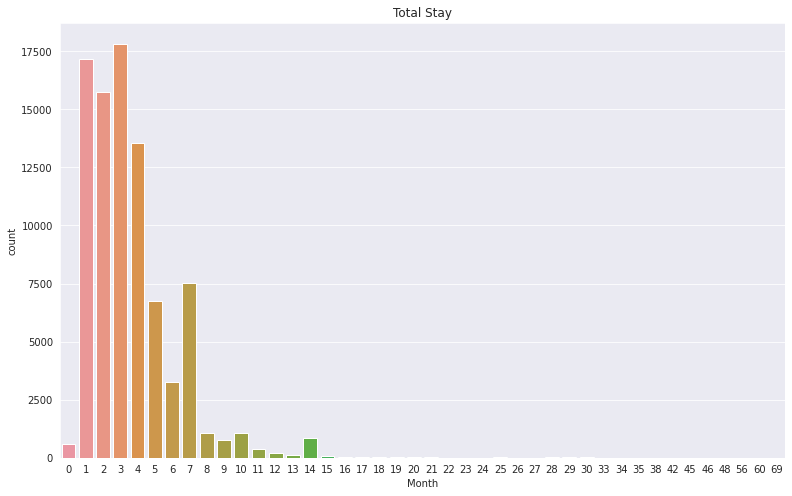

In [103]:
#total_night_stays
#meal
df1=df['total_night_stays']
df1=df1.value_counts()
x=df1.index.values
y=df1.values
plot(x,y,x_label='Month',y_label='count',figsize=(13,8),title='Total Stay')

# **Hotel Wise analysis**

              total_cancelled_bookings  total_bookings  cancel_%
hotel                                                           
City Hotel                       16035           53274     30.10
Resort Hotel                      7974           33956     23.48


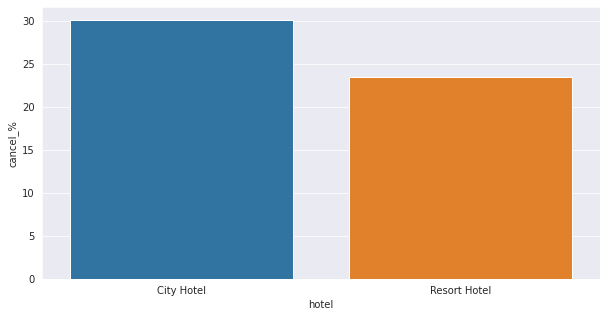

In [104]:
# cancelation %

# Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = df[df['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
print(D3)

plt.figure(figsize = (10,5))
ax = sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.show()

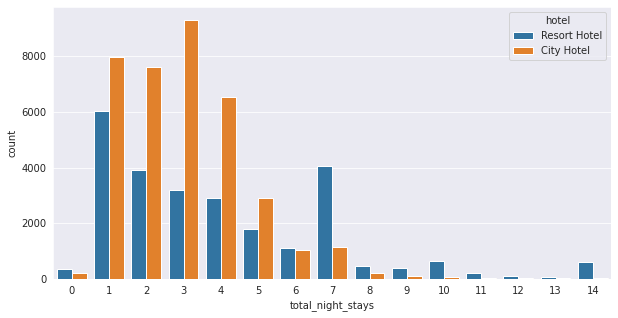

In [105]:
# Total night stays
not_canceled = df[df['is_canceled'] == 0]
s1 = not_canceled[not_canceled['total_night_stays'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['total_night_stays'], hue = s1['hotel'])
plt.show()


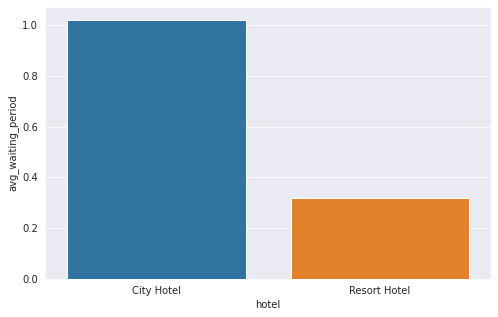

In [106]:
# Days in waiting list
grouped_by_hotel = df.groupby('hotel')
d5 = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,5))
sns.barplot(x = d5['hotel'], y = d5['avg_waiting_period'] )
plt.show()

          hotel     avg_adr
0    City Hotel  111.271969
1  Resort Hotel   99.059517


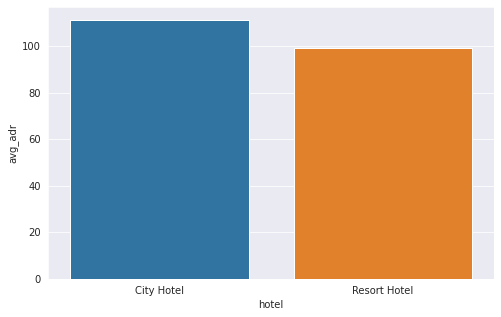

In [110]:
# AVG ADR
grouped_by_hotel = df.groupby('hotel')
d3 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
print(d3)
plt.figure(figsize = (8,5))
sns.barplot(x = d3['hotel'], y = d3['avg_adr'] )
plt.show()

              total_repeated_customers  total_customers  return_%
hotel                                                            
City Hotel                        1657            53274      3.11
Resort Hotel                      1707            33956      5.03


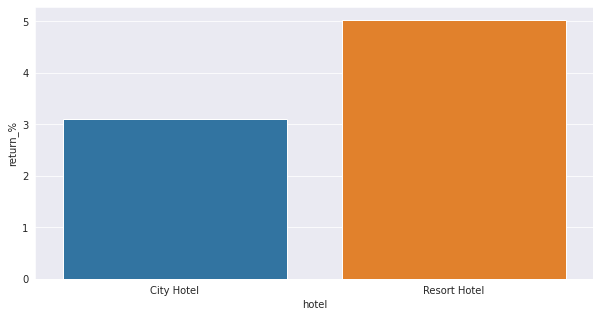

In [111]:
# Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = df[df['is_repeated_guest'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_repeated_customers'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_customers'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['return_%'] = round((D3['total_repeated_customers']/D3['total_customers'])*100,2)
print(D3)

plt.figure(figsize = (10,5))
ax = sns.barplot(x = D3.index, y = D3['return_%'])
plt.show()

# **ADR analysis**

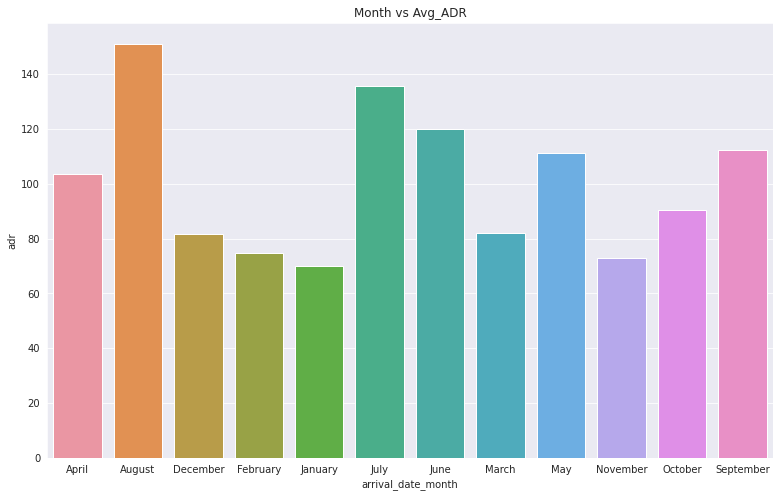

In [114]:
#Month vs Avg adr
df_avg_adr = df.groupby('arrival_date_month', as_index=False)['adr'].mean()
df_avg_adr.head()
df_avg_adr
x=df_avg_adr['arrival_date_month']
y=df_avg_adr['adr']

plot(x,y,x_label='Month',y_label='Avg_ADR',figsize=(13,8),title='Month vs Avg_ADR')

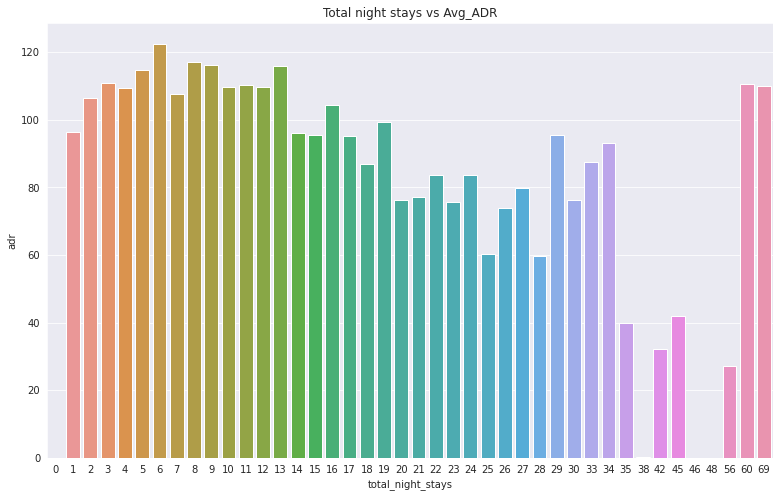

In [125]:
#Total night stays
df_avg_adr = df.groupby('total_night_stays', as_index=False)['adr'].mean()
df_avg_adr.head()
df_avg_adr
x=df_avg_adr['total_night_stays']
y=df_avg_adr['adr']

plot(x,y,x_label='Total night stays',y_label='Avg_ADR',figsize=(13,8),title='Total night stays vs Avg_ADR')

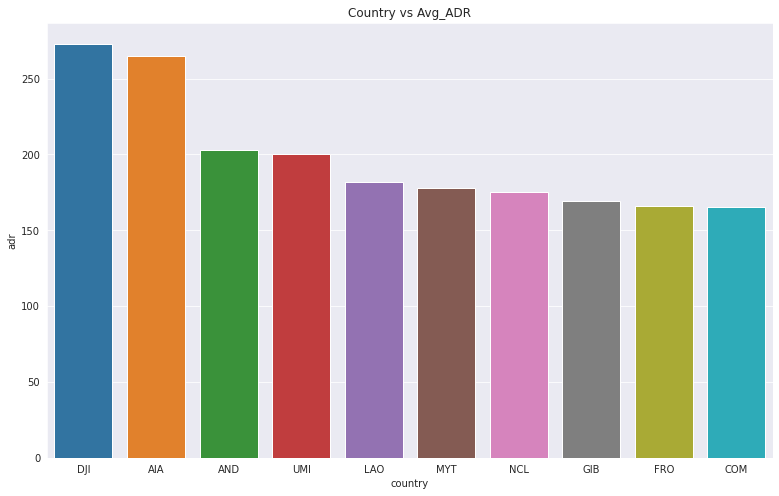

In [116]:
#Country VS adr
df1 = df.groupby('country', as_index=False)['adr'].mean()
df1.sort_values(by='adr',inplace=True,ascending=False)
x=df1['country'][:10]
y=df1['adr']
plot(x,y,x_label='Country',y_label='Avg_ADR',figsize=(13,8),title='Country vs Avg_ADR')

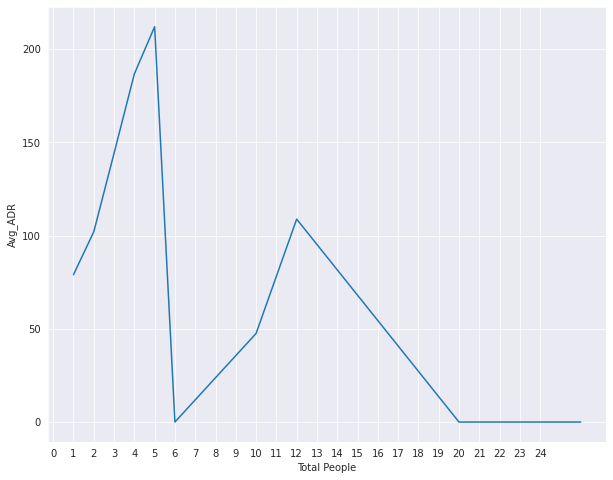

In [119]:
# Total People vs adr
df1 = df.groupby('total_people', as_index=False)['adr'].mean()
df1.sort_values(by='adr',inplace=True,ascending=False)
x=df1['total_people'][:10]
y=df1['adr']
#plot(x,y,x_label='Total People',y_label='Avg_ADR',figsize=(13,8),type='line',title='Total people vs Avg_ADR')
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel('Total People')
ax.set_ylabel('Avg_ADR')
sns.lineplot(x,y, ax = ax)
plt.xticks(range(25))
plt.show()

# **Cancellation analysis**

                total_cancelled_bookings  total_bookings  cancel_%
market_segment                                                    
Aviation                              45             226     19.91
Complementary                         85             692     12.28
Corporate                            509            4200     12.12
Direct                              1737           11780     14.75
Groups                              1332            4922     27.06
Offline TA/TO                       2057           13855     14.85
Online TA                          18242           51553     35.38
Undefined                              2               2    100.00


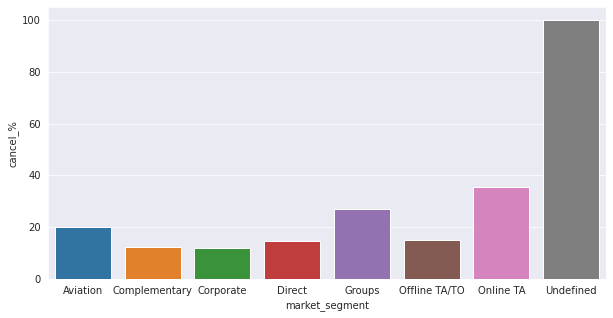

In [126]:
# Market Segment vs Cancellation %

# Selecting and counting number of cancelled bookings for assigned same room or not
cancelled_data = df[df['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('market_segment')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df.groupby('market_segment')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
print(D3)

plt.figure(figsize = (10,5))
ax = sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.show()

                 total_cancelled_bookings  total_bookings  cancel_%
lead_time_month                                                    
0                                  5510.0           33995     16.21
1                                  4252.0           13503     31.49
2                                  3126.0            9484     32.96
3                                  2501.0            7286     34.33
4                                  2050.0            5733     35.76
5                                  1837.0            5296     34.69
6                                  1394.0            3800     36.68
7                                   990.0            2765     35.80
8                                   742.0            1744     42.55
9                                   540.0            1308     41.28
10                                  492.0             992     49.60
11                                  322.0             652     49.39
12                                   70.0       

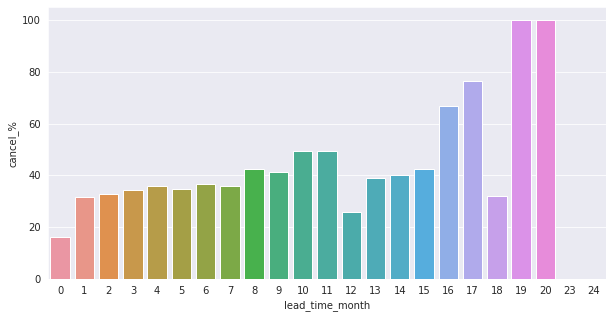

In [127]:
# Lead Time vs Cancellation

# Selecting and counting number of cancelled bookings for assigned same room or not
cancelled_data = df[df['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('lead_time_month')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df.groupby('lead_time_month')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
print(D3)

plt.figure(figsize = (10,5))
ax = sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.show()

              total_cancelled_bookings  total_bookings  cancel_%
deposit_type                                                    
No Deposit                       23000           86085     26.72
Non Refund                         983            1038     94.70
Refundable                          26             107     24.30


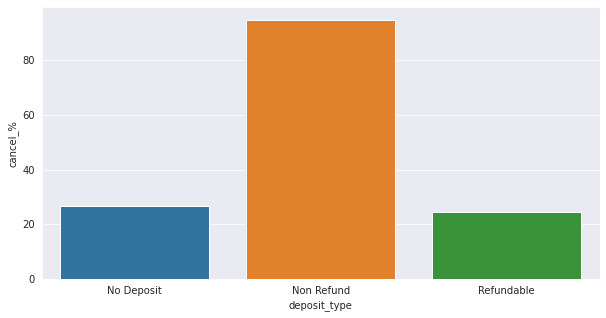

In [128]:
#Deposit type vs cancellation %
# Selecting and counting number of cancelled bookings for assigned same room or not
cancelled_data = df[df['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('deposit_type')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df.groupby('deposit_type')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
print(D3)

plt.figure(figsize = (10,5))
ax = sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.show()

                         total_cancelled_bookings  total_bookings  cancel_%
is_previously_cancelled                                                    
0                                           22866           85549     26.73
1                                            1143            1681     68.00


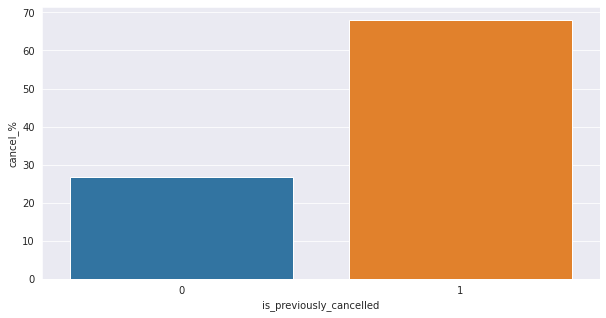

In [131]:
# Previously cancelled vs Cancellation %
# Selecting and counting number of cancelled bookings for assigned same room or not
cancelled_data = df[df['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('is_previously_cancelled')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df.groupby('is_previously_cancelled')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
print(D3)

plt.figure(figsize = (10,5))
ax = sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.show()

                   total_cancelled_bookings  total_bookings  cancel_%
is_repeated_guest                                                    
0                                     23749           83866     28.32
1                                       260            3364      7.73


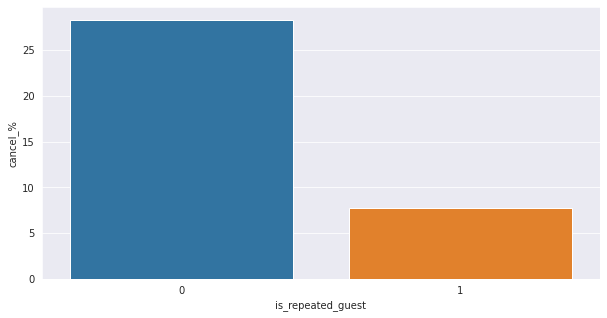

In [132]:
# Repeated Guest vs Cancellation %
# Selecting and counting number of cancelled bookings for assigned same room or not
cancelled_data = df[df['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('is_repeated_guest')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df.groupby('is_repeated_guest')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
print(D3)

plt.figure(figsize = (10,5))
ax = sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.show()